In [1]:
import numpy as np
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import decode_predictions
import matplotlib.pyplot as plt
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

In [2]:
# load and resize the image to 224x224 pixels (required by ResNet50)
image = load_img('/content/cat.jpg', target_size=(224, 224))
image_np = img_to_array(image)

# add an extra dimension to match the model's input shape (batch size, height, width, channels)
image_np = np.expand_dims(image_np, axis=0)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
predictions =  [[('n02124075', 'Egyptian_cat', np.float32(0.63451874)), ('n02123045', 'tabby', np.float32(0.20975216)), ('n02123159', 'tiger_cat', np.float32(0.047797903)), ('n02127052', 'lynx', np.float32(0.036935005)), ('n04209239', 'shower_curtain', np.float32(0.023538478))]]


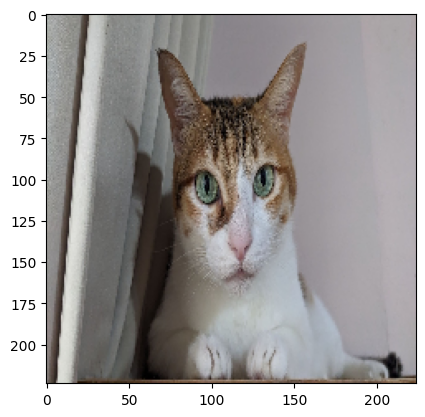

In [3]:
# load the pre-trained model
model = resnet50.ResNet50(weights='imagenet')

# data standardization
X = resnet50.preprocess_input(image_np.copy())

# prediction
y = model.predict(X)
predicted_labels = decode_predictions(y)
print('predictions = ', predicted_labels)

# display result
plt.imshow(np.uint8(image_np[0]))
plt.show()